# Create a Basic NN for Image Classification on the Fashion MNIST Dataset

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras

2023-06-24 12:40:55.060858: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-06-24 12:40:55.060872: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Load the Fashion MNIST dataset from the keras API.

In [2]:
dataset = tf.keras.datasets.fashion_mnist

Split the data into training and testing datasets.

In [3]:
(XTrain, yTrain), (XTest, yTest) = dataset.load_data()

Here's how the training data looks. We can see that it's 60000 images each with 28x28 pixel values ranging from 0-255.

In [4]:
XTrain.shape, yTrain.shape

((60000, 28, 28), (60000,))

Now checking to see whether we can visualise the 987th image in the training images dataset.

In [5]:
index = 987

Label: 4
Image Pixel Values:
[[  0   0   0   0   0   0   0   0   1   0   0  37  90 137 124  74   7   0   0   1   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   2   0   9 218 209 207 211 212 212 221 130   0   3   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   5   0  55 209 172 180 179 177 188 195 157   0   0   5   1   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  19 207 185 202 197 194 185 170 159   2   0   0   0   1   0   0   0   0   0]
 [  0   0   0   0   0   0   0  51 121 192 223 215 176 180 192 209 216 197 181 130  56   0   0   1   0   0   0   0]
 [  0   0   0   0   0   0  77 187 182 171 181 201 220 183 165 191 185 164 162 169 175  91   0   2   0   0   0   0]
 [  0   0   0   0   0   0 149 187 167 175 161 157 172 153 156 164 153 155 159 156 165 154   0   0   0   0   0   0]
 [  0   0   0   0   0   0 174 198 169 168 171 164 171 148 149 168 157 154 158 148 168 185  10   0   0   0   0   0]
 [  0   0   0   0   0   0 188 213 185 168 169 163 1

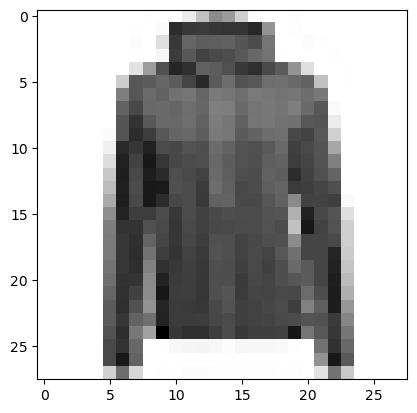

In [6]:
np.set_printoptions(linewidth=300)

image = XTest[index]
label = yTest[index]

print(f'Label: {label}\nImage Pixel Values:\n{image}')
plt.imshow(image, cmap='Greys')

Now, before we create a neural network and pass this data to train it, we need to normalise our data. We do this by dividing every pixel value in all the images across the datasets by 255.

In [7]:
XTrain = XTrain / 255.0
XTest = XTest / 255.0

Checking the documentation for the `Flatten` layer that we can import as `tf.keras.layers.Flatten()`.

In [8]:
tf.keras.layers.Flatten??

Init signature: tf.keras.layers.Flatten(data_format=None, **kwargs)
Source:        
@keras_export('keras.layers.Flatten')
class Flatten(Layer):
  """Flattens the input. Does not affect the batch size.

  Note: If inputs are shaped `(batch,)` without a feature axis, then
  flattening adds an extra channel dimension and output shape is `(batch, 1)`.

  Args:
    data_format: A string,
      one of `channels_last` (default) or `channels_first`.
      The ordering of the dimensions in the inputs.
      `channels_last` corresponds to inputs with shape
      `(batch, ..., channels)` while `channels_first` corresponds to
      inputs with shape `(batch, channels, ...)`.
      It defaults to the `image_data_format` value found in your
      Keras config file at `~/.keras/keras.json`.
      If you never set it, then it will be "channels_last".

  Example:

  >>> model = tf.keras.Sequential()
  >>> model.add(tf.keras.layers.Conv2D(64, 3, 3, input_shape=(3, 32, 32)))
  >>> model.output_shape
  (N

Define our model to be a sequential model with the following layers:
1. A flatten layer to convert a 28x28 image (2D array of pixel intensities) to a 1D array
2. A dense layer to process and extract features with an activation of relu
3. An output layer (dense) with 10 cells corresponding to the 10 output classes with an activation of softmax to get the probabilities 

In [9]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation=tf.nn.relu),
        tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ]
)

2023-06-24 12:40:58.019413: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-06-24 12:40:58.019688: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-06-24 12:40:58.019781: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2023-06-24 12:40:58.019872: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2023-06-24 12:40:58.019943: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

Now, compiling the model using the `Adam` optimiser and sparse categorical cross-entropy as our loss metric.

In [10]:
model.compile(
    optimizer=tf.optimizers.Adam(),
    loss='sparse_categorical_crossentropy',
    # These'll show at the side of each epoch in the training output
    metrics=['Accuracy']
)

Training the model now for a specified number of epochs. It's worth changing this number to see how the training and testing accuracies are affected. 

In [11]:
EPOCHS = 100
history = model.fit(XTrain, yTrain, epochs=EPOCHS)

Epoch 1/100
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5018 - Accuracy: 0.8250
Epoch 2/100
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3757 - Accuracy: 0.8649
Epoch 3/100
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3354 - Accuracy: 0.8783
Epoch 4/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3120 - Accuracy: 0.8845
Epoch 5/100
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2943 - Accuracy: 0.8918
Epoch 6/100
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2809 - Accuracy: 0.8956
Epoch 7/100
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2676 - Accuracy: 0.9007
Epoch 8/100
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2548 - Accuracy: 0.9048
Epoch 9/100
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2480 - Accuracy: 0.9085
Epoch 10/100
1875/1875 [==============================] - 3s 1ms/step - l

Checking the loss and accuracy of the testing data to see whether our model has overfit or not. It's of the form `[loss, accuracy]`.

In [12]:
model.evaluate(XTest, yTest)

313/313 [==============================] - 0s 1ms/step - loss: 0.7826 - Accuracy: 0.8892


[0.782630443572998, 0.88919997215271]

In [13]:
image.shape

(28, 28)

In [14]:
image = np.expand_dims(image, axis=0)
image.shape

(1, 28, 28)

In [15]:
predictions = model.predict(image)

In [16]:
predictions, predictions.shape

(array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32), (1, 10))

In [17]:
print(f'True Label: {label}\nPredicted Label: {np.argmax(predictions)}')

True Label: 4
Predicted Label: 4


In [18]:
# Access the accuracy values for each epoch
accuracyLog = history.history['Accuracy']

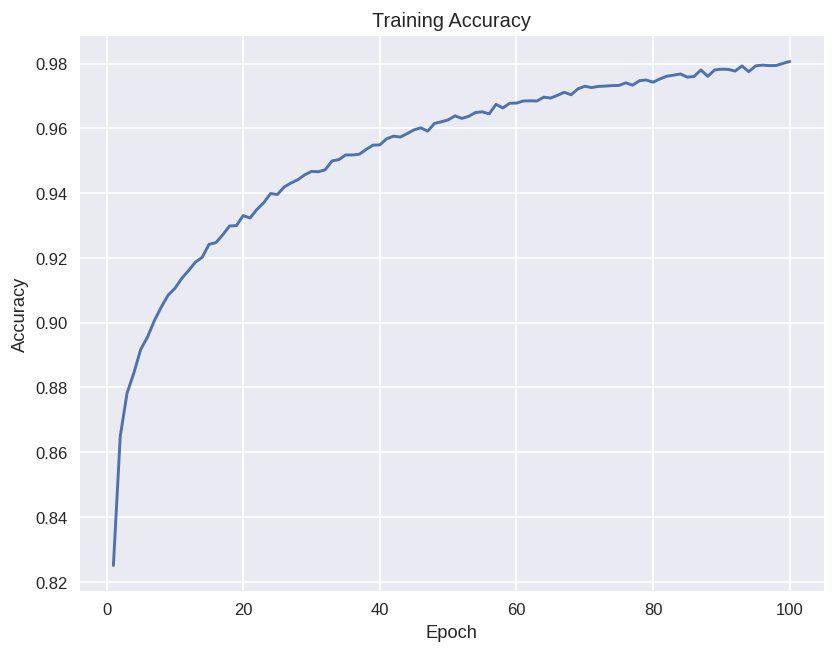

In [19]:
# Plot the accuracy values
plt.style.use('seaborn')

plt.figure(figsize=(8, 6), dpi=120)

plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.plot(range(1, EPOCHS + 1), accuracyLog)

plt.show()

---